In [1]:
# Import the necessary packages

# preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns

In [2]:
def prepare_data(
        data_in: pd.DataFrame,
        selected_features: list[str],
        y_ID: str,
        test_size: float) -> tuple[pd.DataFrame]:
    """Prepare data for training
    Parameters
    ----------
    data_in:
        pandas table containing attributes as columns,
        observations as row
    selected_features:
        list of strings of features to keep
        should match some column names of the data
    y_ID:
        name of the column used as outcome
    test_size:
        fraction of samples to be used as validation data
    Return
    ------
    X_train:
        pandas.DataFrame of the predicting attributes as columns,
        observations as rows
        training subset
    X_test:
        pandas.DataFrame of the predicting attributes as columns,
        observations as rows
        testing subset
    y_train:
        pandas.DataFrame of the outcome attribute as column,
        observations as rows
        training subset
    y_test:
        pandas.DataFrame of the outcome attribute as column,
        observations as rows
        testing subset
    """
    data_subset = data_in[selected_features]
    y = data_subset[y_ID]
    X = data_subset.drop(y_ID, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=42)
    return X_train, X_test, y_train, y_test

In [3]:
def plot_evaluation_result(confusion_matrix:np.ndarray) -> None:
    """Plot confusion matrix
    Parameters
    ----------
    confusion_matrix:
        2D array of a confusion matrix of 2 classes (Positive, Negative) 
    """
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_percentages = ["{0:.2%}".format(value) for value in
                        confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [4]:
def train_eval_model(model, X_train: np.ndarray, y_train: np.ndarray):
    """Train model and evaluate the results
    Parameters
    ----------
    model:
        some type of model following sklearn's interface
    X_train:
        training parameters
    y_train:
        training labels
    """
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_train)
    cf_matrix = confusion_matrix(y_train.values.ravel(), y_pred)
    plot_evaluation_result(cf_matrix)
    acc = accuracy_score(y_train.values.ravel(), y_pred)
    print(f"The accuracy on the validation data is {acc:.2f}")
    return model

In [5]:
def test_eval_model(model, X_valid: np.ndarray, y_valid: np.ndarray) -> None:
    """Train model and evaluate the results
    Parameters
    ----------
    model:
        some type of model following sklearn's interface
    X_train:
        training parameters
    y_train:
        training labels
    """
    y_pred = model.predict(X_valid)
    cf_matrix = confusion_matrix(y_valid.values.ravel(), y_pred)
    plot_evaluation_result(cf_matrix)
    acc = accuracy_score(y_valid.values.ravel(), y_pred)
    print(f"The accuracy on the validation data is {acc:.2f}")

In [6]:
datapath = "../data/train/diabetes_binary_train.csv.zip"
features_of_interest = [
    "Diabetes_binary",
    "Age",
    "Sex",
    "Education",
    "HighBP",
    "HighChol",
    "PhysActivity"]
data_in = pd.read_csv(datapath)
X_train, X_valid, y_train, y_valid = prepare_data(
    data_in,
    features_of_interest,
    "Diabetes_binary",
    0.2)

The accuracy on the validation data is 0.71


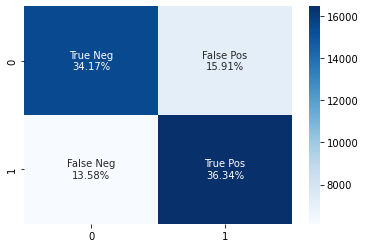

In [7]:
logit_model = LogisticRegression(penalty="l2", random_state=42)
fitted_logit_model = train_eval_model(logit_model, X_train, y_train)

The accuracy on the validation data is 0.70


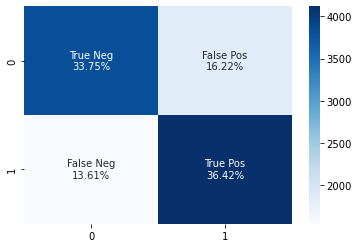

In [8]:
test_eval_model(logit_model, X_valid, y_valid)

The accuracy on the validation data is 0.72


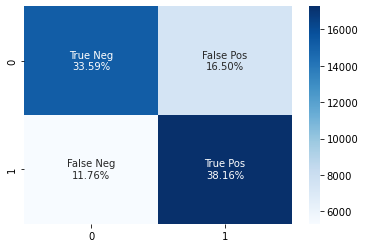

In [9]:
dt_model = DecisionTreeClassifier(random_state=42)
fited_dt_model = train_eval_model(dt_model, X_train, y_train)

The accuracy on the validation data is 0.70


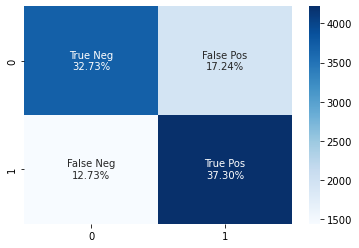

In [10]:
test_eval_model(fited_dt_model, X_valid, y_valid)

The accuracy on the validation data is 0.69


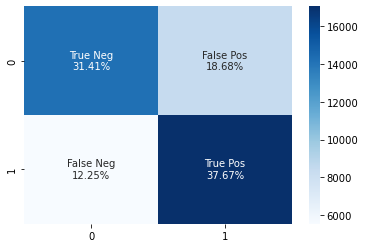

In [11]:
svm_model = SVC(
    kernel = "linear",
    random_state=42)
fitted_svm_model = train_eval_model(svm_model, X_train, y_train)

The accuracy on the validation data is 0.69


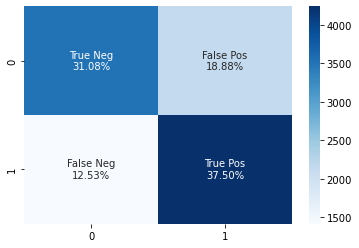

In [12]:
test_eval_model(fitted_svm_model, X_valid, y_valid)